# Imports

In [1]:
import numpy as np
import pandas as pd
import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

# Add the parent folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))
from src.data_processing import describe_dataframe, plot_missing_values, plot_binary_target_with_stats, show_feature_distributions, plot_survival_rate_categorical

# Load Data

In [2]:
train_data = pd.read_csv("../data/raw/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("../data/raw/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Create copies and separate targets from features
titanic_train = train_data.copy()
titanic_train_target = titanic_train["Survived"]
titanic_train = train_data.drop("Survived", axis=1)

titanic_test = test_data.copy()

# Data Exploration

### Missing Values and Data Types

In [5]:
describe_dataframe(titanic_train)

,Missing Count,Missing Percentage,Distinct Values,Mode,Data Type,Feature Type
PassengerId,0,0.000000,891,1,int64,Numerical
Pclass,0,0.000000,3,3,int64,Categorical
Name,0,0.000000,891,"Abbing, Mr. Anthony",object,Categorical
Sex,0,0.000000,2,male,object,Categorical
Age,177,0.198653,88,24.0,float64,Numerical
SibSp,0,0.000000,7,0,int64,Categorical
Parch,0,0.000000,7,0,int64,Categorical
Ticket,0,0.000000,681,1601,object,Categorical
Fare,0,0.000000,248,8.05,float64,Numerical
Cabin,687,0.771044,147,B96 B98,object,Categorical


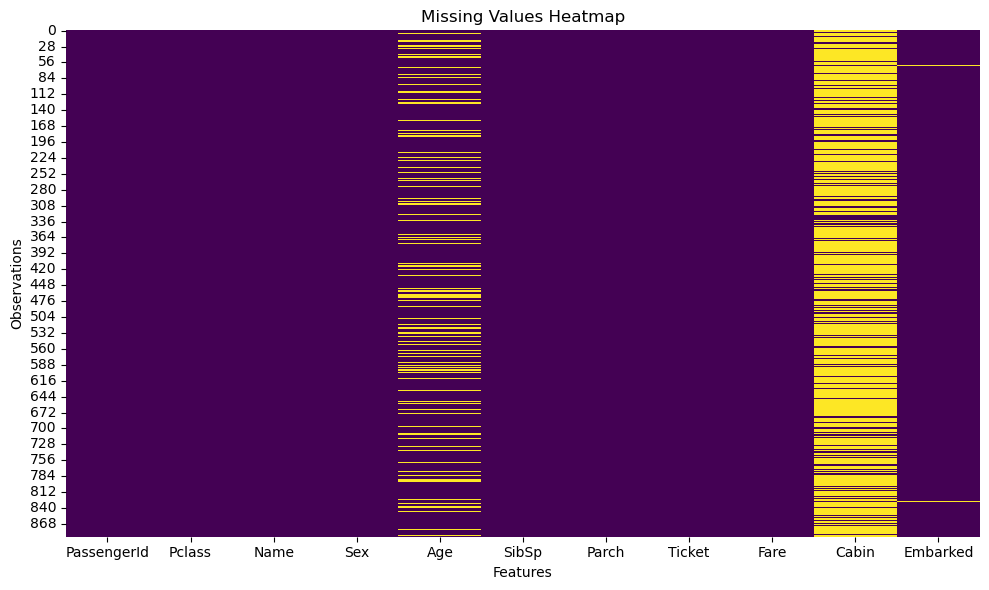

In [6]:
plot_missing_values(titanic_train)

### Target Distribution

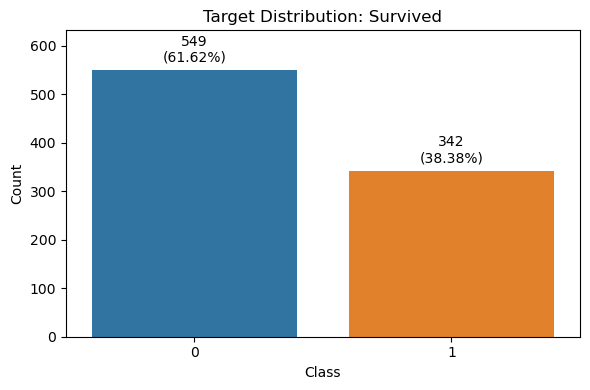

In [7]:
plot_binary_target_with_stats(titanic_train_target, target_col="Survived", class_labels={0: "Alive", 1: "Dead"})


### Feature Distributions

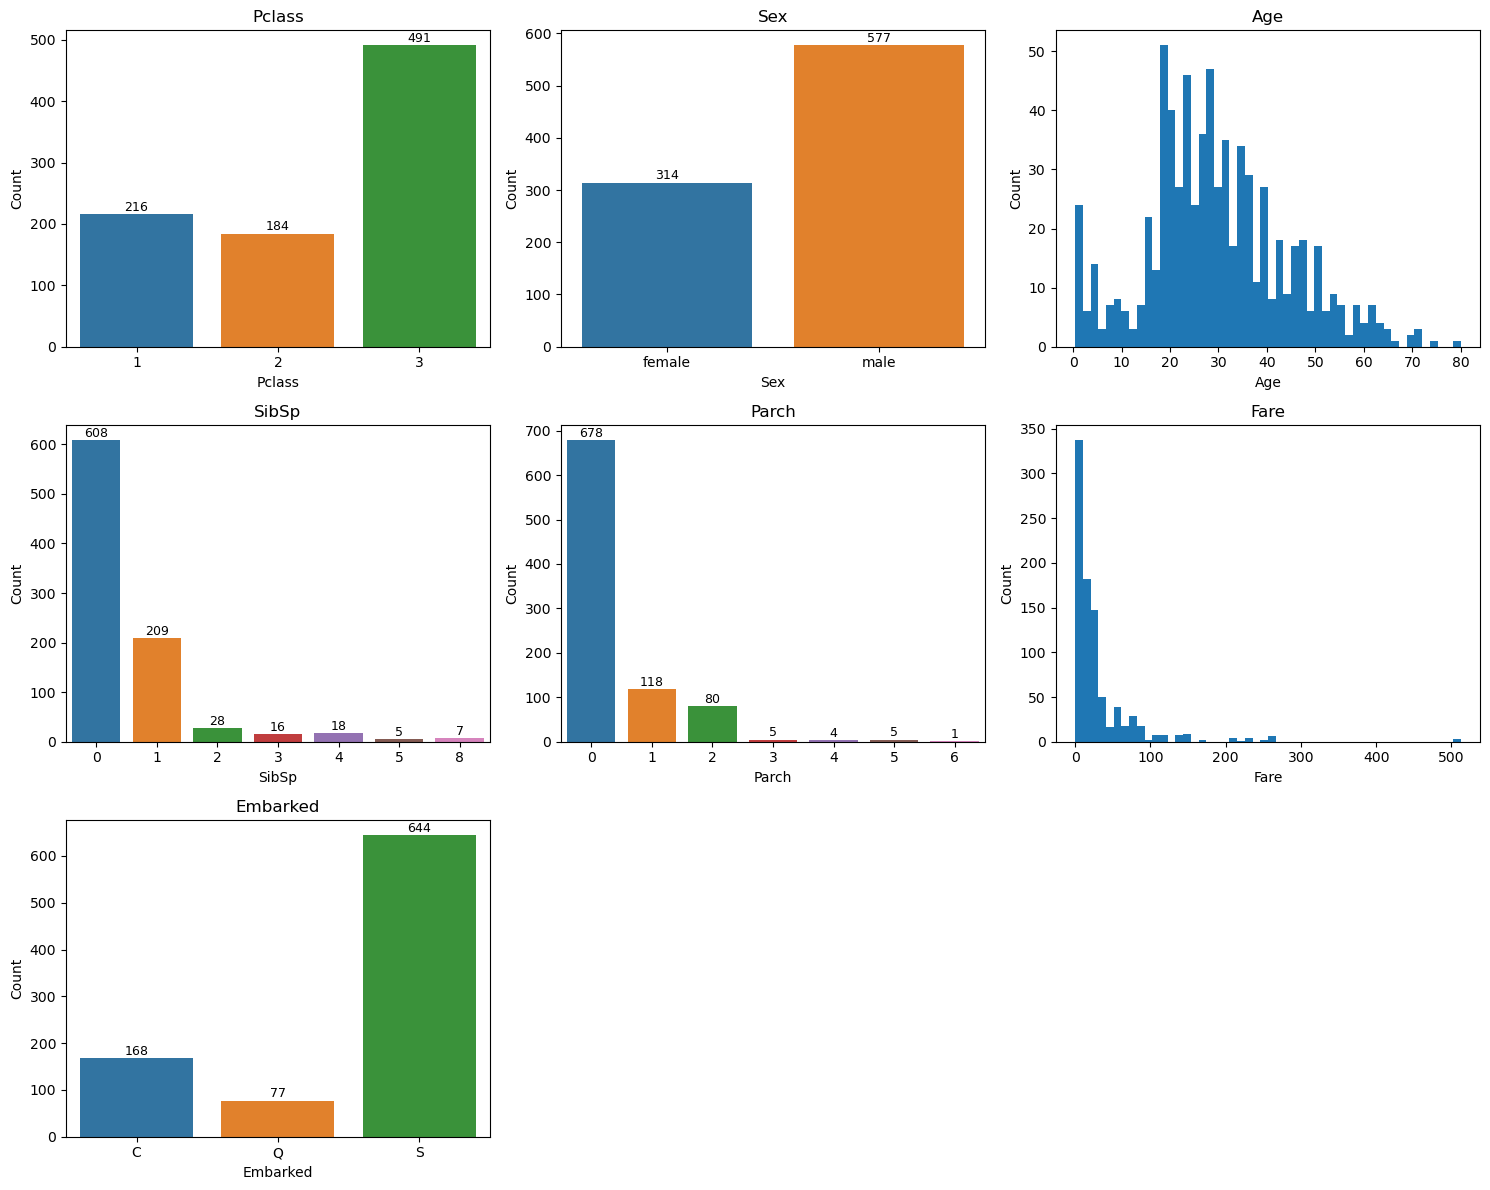

In [8]:
show_feature_distributions(
    titanic_train,
    titanic_train.columns,
    n_cols=3,
    cat_max_unique=10,
    exclude_cols=["PassengerId"]
)

### Survival Rate per Feature

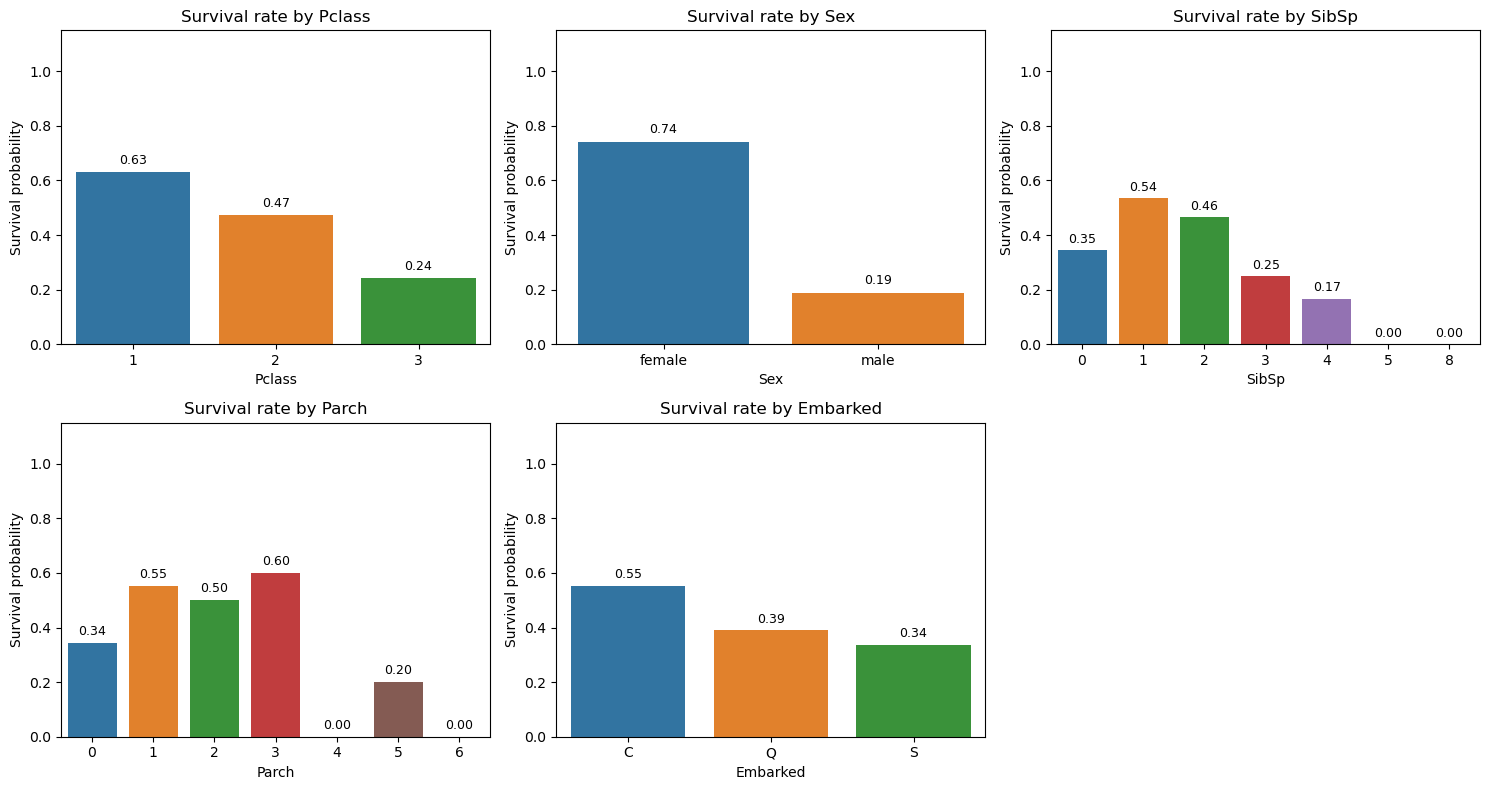

In [10]:
plot_survival_rate_categorical(
    titanic_train,
    titanic_train_target,
    exclude_cols=["PassengerId", "Name", "Ticket", "Cabin"]
)

# Other Ideas

In [18]:
def plot_survival_rate_numeric(
    X,
    y,
    col,
    bins=10,
    strategy="quantile"  # "uniform" also possible
):
    if strategy == "quantile":
        binned = pd.qcut(X[col], q=bins, duplicates="drop")
    else:
        binned = pd.cut(X[col], bins=bins)

    data = pd.DataFrame({
        col: binned,
        "target": y
    })

    rates = data.groupby(col, observed=True)["target"].mean()
    counts = data.groupby(col, observed=True)["target"].count()

    plt.figure(figsize=(7, 4))
    sns.barplot(x=rates.index.astype(str), y=rates.values)

    for i, (rate, cnt) in enumerate(zip(rates.values, counts.values)):
        plt.text(i, rate + 0.02, f"{rate:.2f}\n(n={cnt})",
                 ha="center", va="bottom", fontsize=9)

    plt.ylim(0, 1.15)
    plt.xticks(rotation=30)
    plt.ylabel("Survival probability")
    plt.title(f"Survival rate by {col} (binned)")
    plt.tight_layout()
    plt.show()


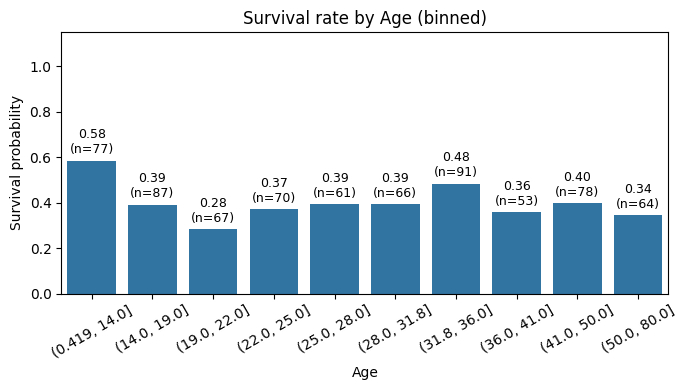

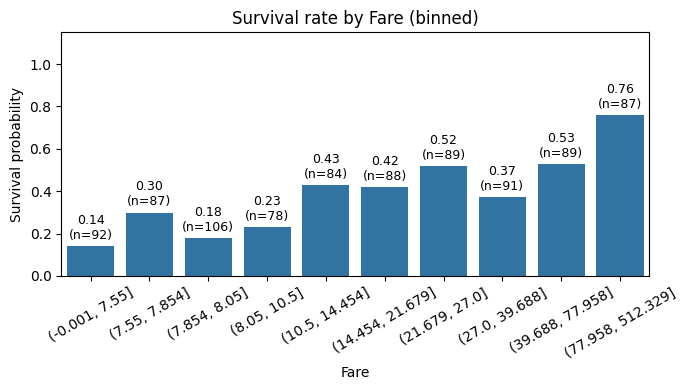

In [19]:
plot_survival_rate_numeric(titanic_train, titanic_train_target, "Age")
plot_survival_rate_numeric(titanic_train, titanic_train_target, "Fare")

In [20]:
def plot_numeric_by_target(X, y, col):
    data = pd.DataFrame({col: X[col], "target": y})

    plt.figure(figsize=(6, 4))
    sns.boxplot(x="target", y=col, data=data)
    sns.stripplot(x="target", y=col, data=data,
                  color="green", alpha=0.3)

    plt.title(f"{col} distribution by survival")
    plt.tight_layout()
    plt.show()


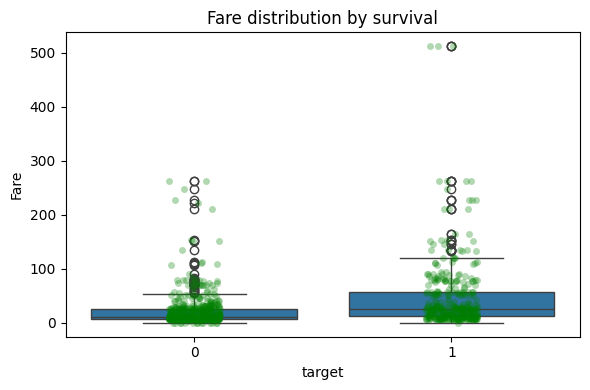

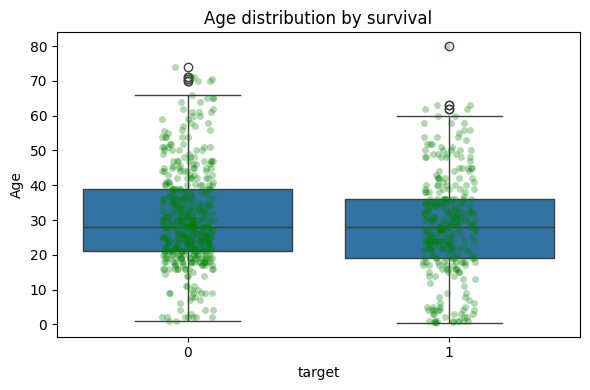

In [21]:
plot_numeric_by_target(titanic_train, titanic_train_target, "Fare")
plot_numeric_by_target(titanic_train, titanic_train_target, "Age")

In [22]:
# group by Sex, Pclass, and Title 
grouped = titanic_train.groupby(['Sex','Pclass', 'Title'])  
# view the median Age by the grouped features 
grouped.Age.count()#.median()

Sex     Pclass  Title  
female  1       Miss        47
                Mrs         35
                Officer      1
                Royalty      2
        2       Miss        33
                Mrs         41
        3       Miss        69
                Mrs         33
male    1       Master       3
                Mr          87
                Officer      8
                Royalty      3
        2       Master       9
                Mr          82
                Officer      8
        3       Master      24
                Mr         229
Name: Age, dtype: int64

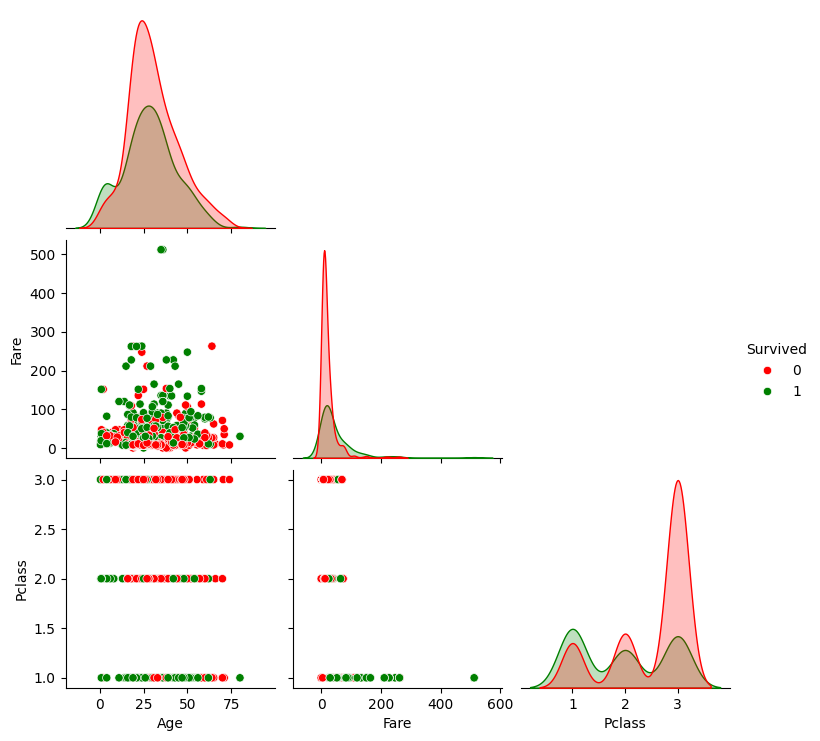

In [23]:
df_plot = titanic_train.copy()
df_plot["Survived"] = titanic_train_target  # add target as column

numeric_features = ["Age", "Fare", "Pclass"]  # adjust as needed

sns.pairplot(
    df_plot[numeric_features + ["Survived"]],
    hue="Survived",
    palette={0: "red", 1: "green"},
    diag_kind="kde",
    corner=True
)
plt.show()

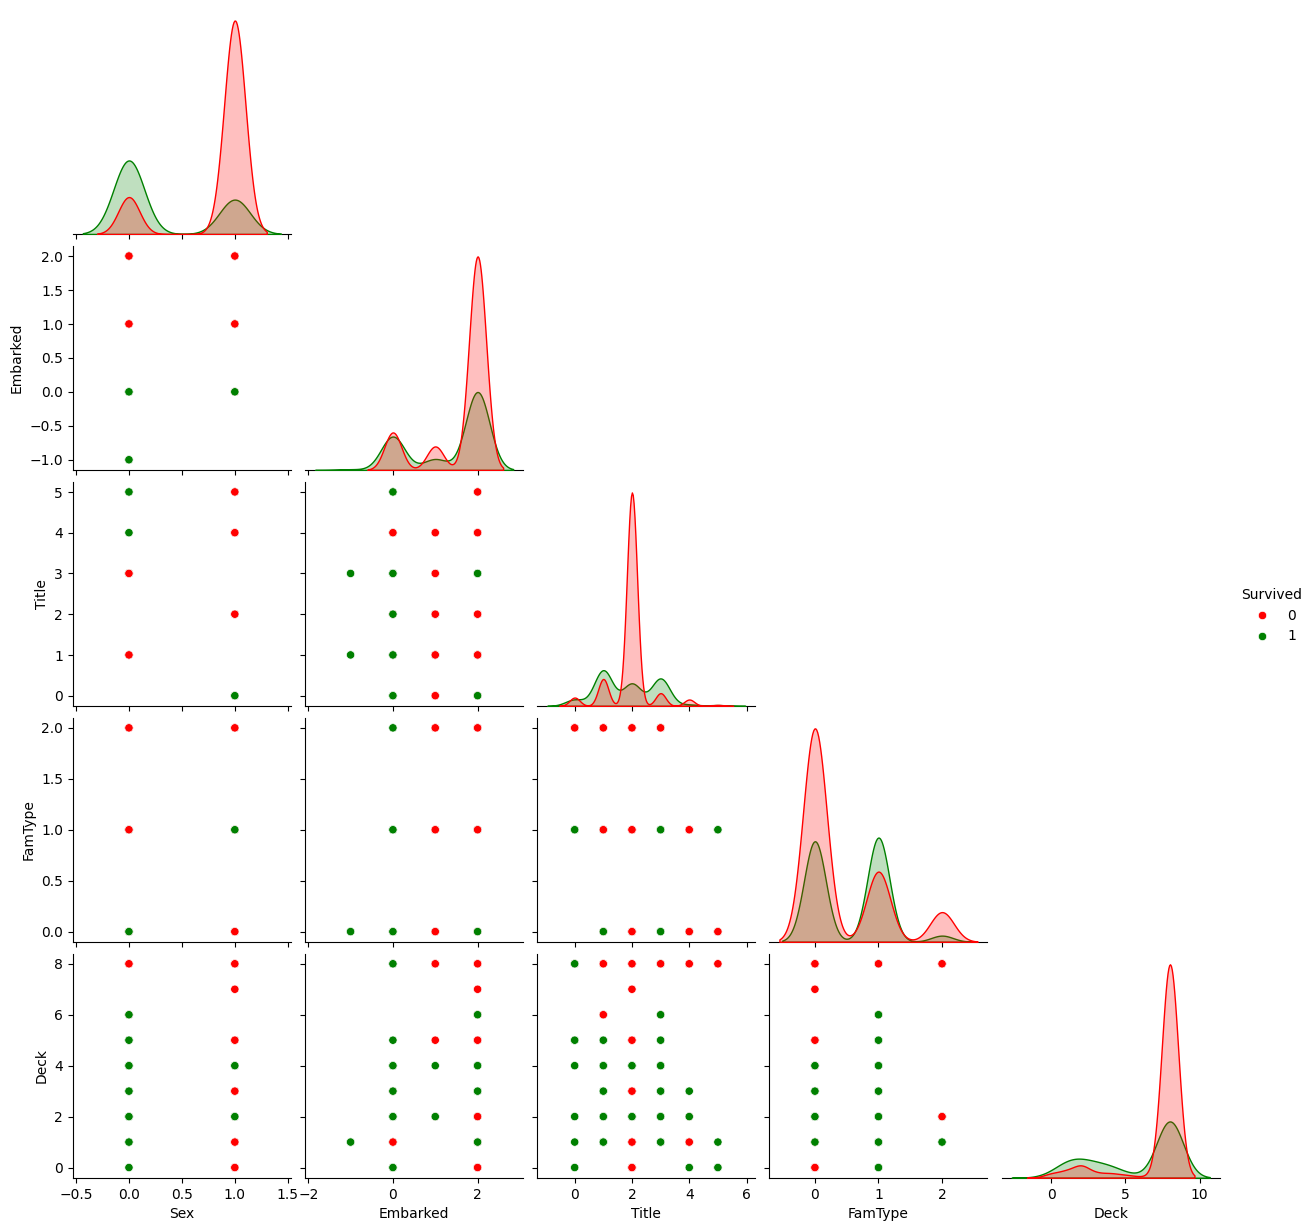

In [24]:
cat_features = ["Sex", "Embarked", "Title", "FamType", "Deck"]

# Encode categories numerically
df_plot_encoded = df_plot.copy()
for col in cat_features:
    df_plot_encoded[col] = df_plot_encoded[col].astype("category").cat.codes

sns.pairplot(
    df_plot_encoded[cat_features + ["Survived"]],
    hue="Survived",
    palette={0: "red", 1: "green"},
    corner=True
)
plt.show()


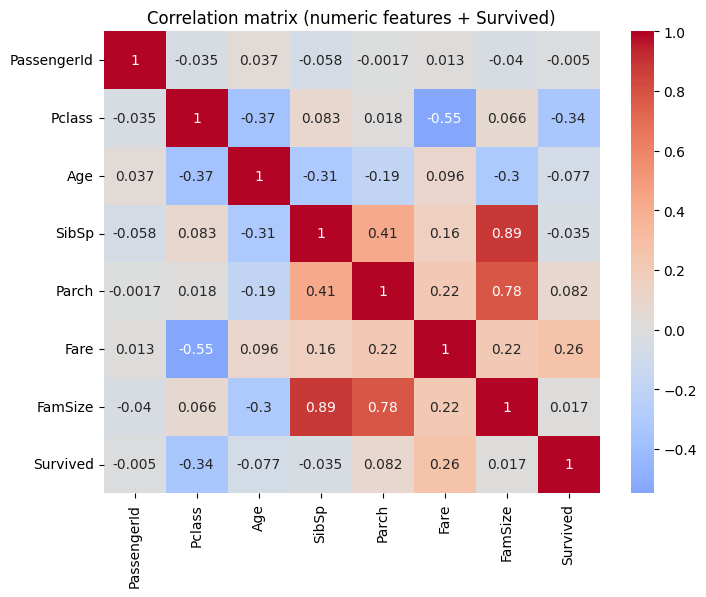

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features + target
df_corr = titanic_train.copy()
df_corr["Survived"] = titanic_train_target

# Select numeric columns
numeric_cols = df_corr.select_dtypes(include=["int64","float64"]).columns

# Compute correlation matrix
corr_matrix = df_corr[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation matrix (numeric features + Survived)")
plt.show()


### Correlation

In [26]:
# If your target is a Series or single-column DataFrame
if isinstance(titanic_train_target, pd.DataFrame):
    titanic_train_target = titanic_train_target.iloc[:, 0]

# Align indices and join
data = titanic_train.join(titanic_train_target.rename("Survived"), how="inner")

# Compute numeric correlations
corr_matrix = data.corr(numeric_only=True)

# Sort features by correlation with target
target_corr = corr_matrix["Survived"].sort_values(ascending=False)
target_corr

Survived       1.000000
Fare           0.257307
Parch          0.081629
FamSize        0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

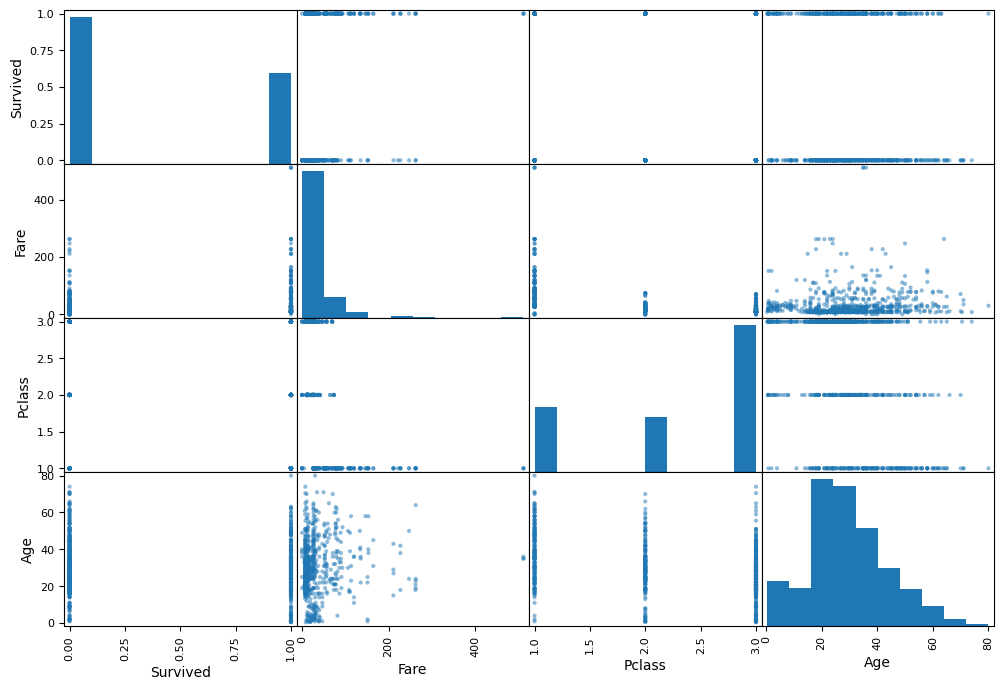

In [27]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Pclass", "Age"]
scatter_matrix(train_data[attributes], figsize=(12, 8))
plt.show()